# Investment Tool for Simulation & Risk Assessments

![Image of graph](https://www.image-illustration.net/wp-content/uploads/2018/01/financial-analysis-minimal-wallpaper.jpg)

### Purpose 
From deciding how much you would need to add to your portfolio to make it risk averse, to simulating new portfolios to see the optimal allocation to minimise risk and maximise returns. 

#### Features: 
1. Correlation table of portfolios
2. Buy quantity based on risk assessment of financial asset into current portfolio
3. Portfolio simulations for reallocation purposes to maximise returns given the amount of risk taken

#### Link to GitHub Project
* https://github.com/Luumo/financial-investment-tools/projects/1?add_cards_query=is%3Aopen

### Import modules needed

In [1]:
from financelib.portfolio import Portfolio, merge_dataframes
from financelib import analytics
import pandas as pd
import numpy as np
%config IPCompleter.greedy=True

### Set up portfolio with your holdings

In [2]:

portfolio_list = ["AMZN", # Amazon
                  "GOOG", # Alphapet C
                  "ABB", # ABB
                  "ARISE.ST", # Arise
                  "ATRLJ-B.ST", # Atrium Ljungberg
                  "AXFO.ST" # Axfood
                  ] 

my_portfolio = Portfolio(portfolio_list)


### Correlation table
- To assess what how the returns are correlated
- Number closer to zero = the better 

In [3]:
# Calc correlations
my_portfolio_correlation = analytics.correlation_table(my_portfolio, "5y")
# Pretty print
my_portfolio_correlation.reset_index(drop=True).style.background_gradient(cmap='viridis').set_precision(2)

# Create portfolio and sum up all stock returns

In [4]:
portfolio = Portfolio(portfolio_list)
portfolio_total_returns = portfolio.total_returns('1y')
print(portfolio_total_returns)

            Portfolio
Date                 
2019-07-29    3568.73
2019-07-30    3538.45
2019-07-31    3499.24
2019-08-01    3480.48
2019-08-02    3436.06
...               ...
2020-07-23    4896.51
2020-07-24    4911.52
2020-07-27    4975.36
2020-07-28    4891.82
2020-07-29    4943.60

[260 rows x 1 columns]


# Plot stock total returns

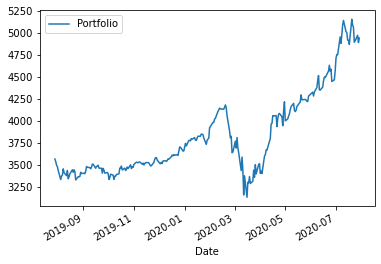

In [5]:
portfolio_total_returns.plot()
# portfolio_returns.plot(logy=True)


# Stocks only

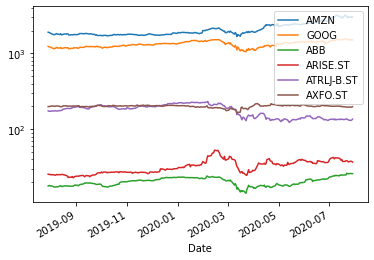

In [6]:

portfolio_stock_returns = portfolio.returns('1y')
portfolio_stock_returns.plot(logy=True)

# Portfolio + stocks

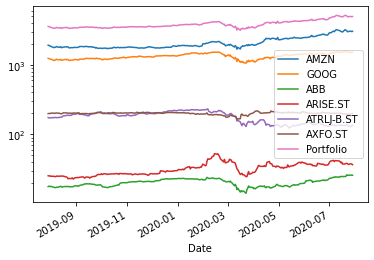

In [7]:
# merge portfolio dataframe + stock dataframes
merged_data = merge_dataframes([portfolio_stock_returns, portfolio_total_returns])
# plot merged data
merged_data.plot(logy=True)

# Dags att gå lös

Analysis walk through = https://www.youtube.com/watch?v=kBwOy-6CtAQ

Monte carlo = https://www.youtube.com/watch?v=_T0l015ecK4

In [8]:
%matplotlib inline
import os
import random
import datetime
import numpy as np
from ipywidgets import interact, fixed, IntSlider, SelectMultiple
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import seaborn as sns
import yfinance as yf

In [21]:
df = log_returns
prf_stocks = ["AAPL", "FB", "GOOG", "PORTFOLIO"]
def multiplot(symbols):
    opts = df.columns.values
    df.loc[:, symbols].plot()

interactive = interact(multiplot, symbols=prf_stocks)

interactive(children=(Dropdown(description='symbols', options=('AAPL', 'FB', 'GOOG', 'PORTFOLIO'), value='AAPL…

In [22]:
sel_mul = SelectMultiple(description="symbols", options=df.columns,value=prf_stocks, disabled=False)
@interact(variables=sel_mul)
def plot_multiple(variables):
    df[list(variables)].plot()

interactive(children=(SelectMultiple(description='symbols', index=(0, 1, 2, 3), options=('AAPL', 'FB', 'GOOG',…

In [23]:
prf_returns = portfolio.total_returns('1y')
prf_pct = (prf_returns.pct_change() +1)

In [48]:
# Simualtion 

K = 60 
num_sim = 1000 #number of runs of simulations

simulated = pd.DataFrame([((prf_pct.iloc[random.choices(range(len(prf_returns)), k=K)]).mean(axis=1)).cumprod().values for x in range (num_sim)]).T

In [49]:
print(prf_pct)

            Portfolio
Date                 
2019-07-29        NaN
2019-07-30   0.991515
2019-07-31   0.988919
2019-08-01   0.994639
2019-08-02   0.987237
...               ...
2020-07-23   0.966620
2020-07-24   1.003065
2020-07-27   1.012998
2020-07-28   0.983209
2020-07-29   1.010730

[260 rows x 1 columns]


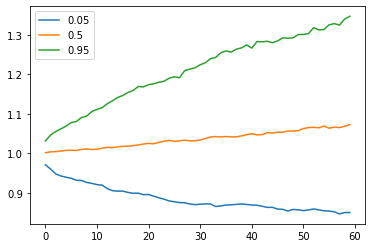

In [50]:
simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot()

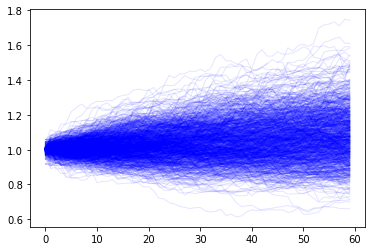

In [51]:
simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue')

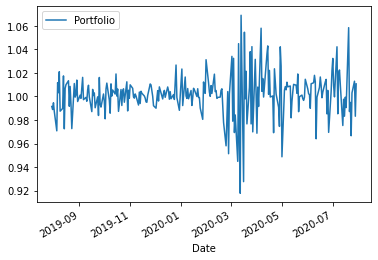

In [27]:
prf_pct.plot()

In [47]:
# Here we want to see how our prediction performed against the real data

